<a href="https://colab.research.google.com/github/PikalounJM/Team-Project/blob/main/wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import openpyxl
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.unicode_minus'] = False

with open('/Users/gimjimin/Downloads/gratereview.txt', 'r') as file:
    content = file.read()

In [ ]:
from nltk.corpus import stopwords
import nltk
import re

# 1-1) 긍정 감성 키워드 추출(명사)

In [ ]:
# review text를 하나의 문자열로 합치기
great_review = ''.join(content)

def preprocess_text(text):
    # 숫자 제거
    text = re.sub(r'\d+', '', text)
    # 특수문자 제거
    text = re.sub(r'[^\w\s]', '', text)
    # 소문자 변환
    text = text.lower()
    return text

def extract_nouns(text):
    tokens = nltk.word_tokenize(text)
    # 여기서 pos를 정의하고 사용합니다.
    nouns = [word for (word, pos) in nltk.pos_tag(tokens) if pos.startswith('N')]
    return nouns

#전처리 적용
preprocess = preprocess_text(great_review)

# 명사 추출
nouns = extract_nouns(preprocess)

# 불용어 제거
stop_words = set(stopwords.words('english'))
filtered_nouns = [word for word in nouns if word.lower() not in stop_words]

# 명사 빈도 계산
freq_dist = nltk.FreqDist(filtered_nouns)

freq_dist.most_common()

[('place', 24398),
 ('location', 12391),
 ('beach', 11523),
 ('stay', 10397),
 ('home', 9903),
 ('host', 9507),
 ('house', 9187),
 ('everything', 9110),
 ('room', 7954),
 ('time', 6374),
 ('area', 6175),
 ('space', 5615),
 ('pool', 4776),
 ('bed', 4087),
 ('restaurants', 3972),
 ('apartment', 3888),
 ('neighborhood', 3705),
 ('family', 3391),
 ('hosts', 3301),
 ('kitchen', 3089),
 ('night', 3066),
 ('bathroom', 2786),
 ('experience', 2720),
 ('day', 2660),
 ('amenities', 2595),
 ('communication', 2419),
 ('condo', 2305),
 ('trip', 2285),
 ('people', 2156),
 ('minutes', 2147),
 ('thanks', 2132),
 ('view', 2124),
 ('walk', 2113),
 ('coffee', 2111),
 ('plenty', 2085),
 ('water', 2077),
 ('distance', 2071),
 ('access', 2060),
 ('value', 2052),
 ('airbnb', 1957),
 ('towels', 1902),
 ('property', 1764),
 ('check', 1745),
 ('drive', 1734),
 ('beds', 1719),
 ('questions', 1695),
 ('thank', 1692),
 ('spot', 1692),
 ('bedroom', 1593),
 ('street', 1587),
 ('lots', 1579),
 ('unit', 1579),
 ('thing

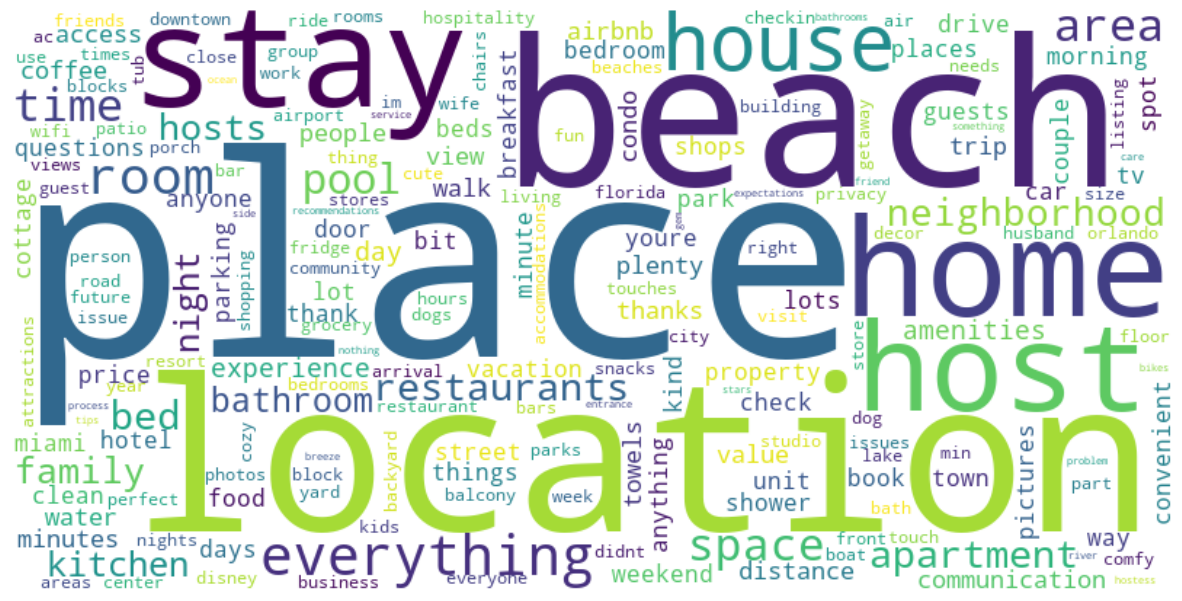

In [ ]:
from wordcloud import WordCloud

# WordCloud 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

# WordCloud 시각화
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 1-2) 긍정 감성 키워드 추출(형용사)

In [ ]:
def preprocess_text(text):
    # 숫자 제거
    text = re.sub(r'\d+', '', text)
    # 특수문자 제거
    text = re.sub(r'[^\w\s]', '', text)
    # 소문자 변환
    text = text.lower()
    return text


def extract_adjectives(text):
    tokens = nltk.word_tokenize(text)
    # 여기서 pos를 정의하고 사용합니다.
    adjectives = [word for (word, pos) in nltk.pos_tag(tokens) if pos.startswith('JJ')]
    return adjectives

#전처리 적용
preprocess = preprocess_text(great_review)

#형용사 추출
adject = extract_adjectives(great_review)

# 불용어 제거
stop_words = set(stopwords.words('english'))
filtered_adjectives = [word for word in adject if word.lower() not in stop_words]

#형용사 빈도 계산
freq = nltk.FreqDist(filtered_adjectives)

freq.most_common()

[('great', 20609),
 ('clean', 12814),
 ('comfortable', 9480),
 ('nice', 9061),
 ('perfect', 6319),
 ('quiet', 5458),
 ('easy', 5112),
 ('beautiful', 4406),
 ('good', 4257),
 ('wonderful', 3918),
 ('super', 3636),
 ('little', 3556),
 ('private', 2808),
 ('friendly', 2751),
 ('spacious', 2454),
 ('helpful', 2399),
 ('amazing', 2379),
 ('quick', 2353),
 ('next', 2248),
 ('close', 2185),
 ('best', 2143),
 ('short', 2119),
 ('sure', 1956),
 ('safe', 1860),
 ('responsive', 1853),
 ('many', 1838),
 ('awesome', 1831),
 ('available', 1817),
 ('excellent', 1799),
 ('small', 1785),
 ('able', 1582),
 ('much', 1553),
 ('first', 1496),
 ('fantastic', 1442),
 ('large', 1412),
 ('right', 1350),
 ('convenient', 1343),
 ('’', 1255),
 ('better', 1253),
 ('local', 1250),
 ('hot', 1189),
 ('big', 1108),
 ('lovely', 1106),
 ('cozy', 1093),
 ('extra', 1047),
 ('full', 990),
 ('new', 988),
 ('cute', 978),
 ('peaceful', 884),
 ('last', 848),
 ('warm', 842),
 ('sweet', 769),
 ('late', 758),
 ('long', 732),
 ('h

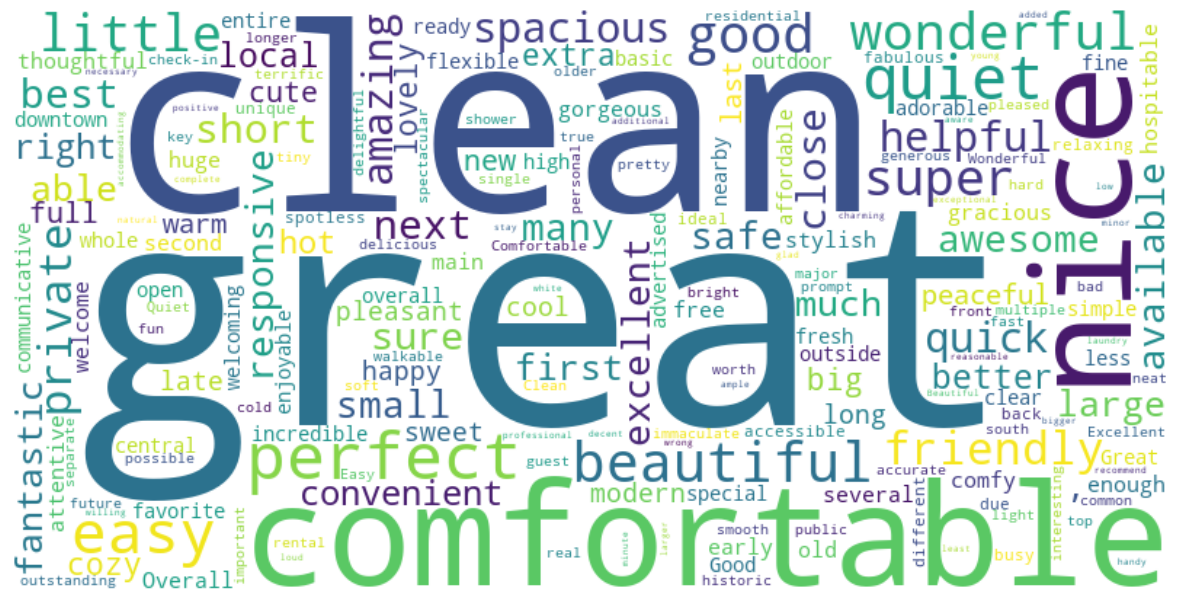

In [ ]:
# WordCloud 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq)

# WordCloud 시각화
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 1-3) 긍정 감성 키워드 추출(동사)

In [ ]:
def extract_verbs(text):
    tokens = nltk.word_tokenize(text)
    # 여기서 pos를 정의하고 사용합니다.
    verbs = [word for (word, pos) in nltk.pos_tag(tokens) if pos.startswith('VB')]
    return verbs

# 전처리 적용
preprocessed_review = preprocess_text(great_review)

# 동사 추출
verbs = extract_verbs(preprocessed_review)

# 불용어 제거
stop_words = set(stopwords.words('english'))
filtered_verbs = [word for word in verbs if word.lower() not in stop_words]

# 동사 빈도 계산
verb = nltk.FreqDist(filtered_verbs)

verb.most_common()

[('stay', 11092),
 ('recommend', 7009),
 ('needed', 4361),
 ('loved', 4090),
 ('staying', 3888),
 ('enjoyed', 3818),
 ('get', 3710),
 ('made', 3572),
 ('need', 3376),
 ('stayed', 2874),
 ('located', 2448),
 ('walking', 2237),
 ('make', 2231),
 ('go', 2223),
 ('felt', 2131),
 ('feel', 2052),
 ('come', 2051),
 ('amazing', 2046),
 ('accommodating', 1983),
 ('looking', 1964),
 ('provided', 1847),
 ('want', 1781),
 ('didnt', 1614),
 ('love', 1460),
 ('enjoy', 1405),
 ('use', 1389),
 ('check', 1337),
 ('went', 1303),
 ('decorated', 1238),
 ('got', 1235),
 ('walk', 1233),
 ('find', 1193),
 ('see', 1152),
 ('gave', 1064),
 ('arrived', 1061),
 ('going', 1049),
 ('welcoming', 1034),
 ('return', 986),
 ('visit', 984),
 ('parking', 918),
 ('appreciated', 893),
 ('left', 882),
 ('stocked', 878),
 ('came', 874),
 ('know', 873),
 ('respond', 873),
 ('visiting', 864),
 ('beach', 859),
 ('downtown', 854),
 ('say', 853),
 ('found', 841),
 ('wanted', 834),
 ('worked', 828),
 ('take', 810),
 ('recommended

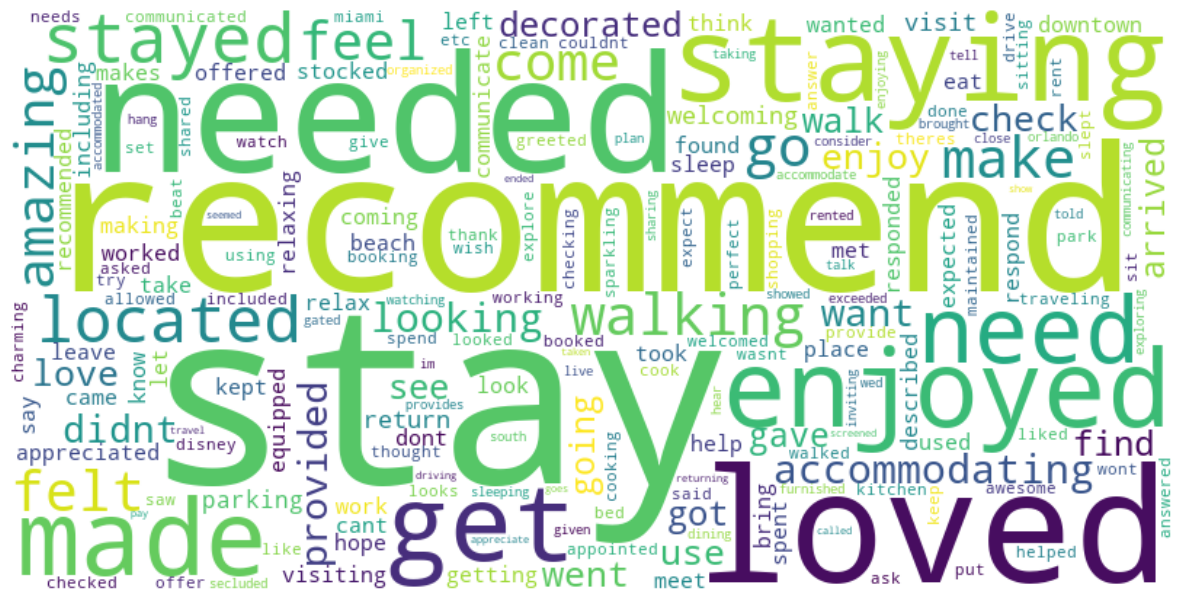

In [ ]:
# WordCloud 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(verb)

# WordCloud 시각화
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 2-1) 보통 감성 키워드 추출(명사)

In [ ]:
with open('/Users/gimjimin/Downloads/commonreveiw.txt', 'r') as file:
    common = file.read()

In [ ]:
# review text를 하나의 문자열로 합치기
common_review = ''.join(common)

def preprocess_text(text):
    # 숫자 제거
    text = re.sub(r'\d+', '', text)
    # 특수문자 제거
    text = re.sub(r'[^\w\s]', '', text)
    # 소문자 변환
    text = text.lower()
    return text

def extract_nouns(text):
    tokens = nltk.word_tokenize(text)
    # 여기서 pos를 정의하고 사용합니다.
    nouns = [word for (word, pos) in nltk.pos_tag(tokens) if pos.startswith('N')]
    return nouns

#전처리 적용
preprocess = preprocess_text(common_review)

# 명사 추출
nouns = extract_nouns(preprocess)

# 불용어 제거
stop_words = set(stopwords.words('english'))
filtered_nouns = [word for word in nouns if word.lower() not in stop_words]

# 명사 빈도 계산
freq_dist = nltk.FreqDist(filtered_nouns)

freq_dist.most_common()

[('place', 1280),
 ('host', 1159),
 ('arrival', 808),
 ('reservation', 806),
 ('location', 721),
 ('days', 719),
 ('posting', 568),
 ('beach', 359),
 ('stay', 345),
 ('everything', 300),
 ('house', 246),
 ('room', 242),
 ('home', 205),
 ('day', 204),
 ('space', 184),
 ('time', 181),
 ('value', 162),
 ('area', 157),
 ('night', 145),
 ('spot', 131),
 ('muy', 116),
 ('thanks', 113),
 ('restaurants', 105),
 ('family', 104),
 ('bed', 99),
 ('apartment', 99),
 ('price', 99),
 ('people', 94),
 ('pool', 92),
 ('view', 88),
 ('experience', 87),
 ('airbnb', 84),
 ('trip', 83),
 ('communication', 83),
 ('thank', 83),
 ('hosts', 81),
 ('amenities', 80),
 ('book', 79),
 ('distance', 77),
 ('access', 76),
 ('issues', 76),
 ('check', 71),
 ('bathroom', 70),
 ('walk', 68),
 ('minutes', 67),
 ('que', 66),
 ('para', 64),
 ('condo', 62),
 ('con', 61),
 ('unit', 61),
 ('casa', 59),
 ('property', 59),
 ('e', 58),
 ('issue', 57),
 ('street', 57),
 ('door', 55),
 ('la', 55),
 ('water', 54),
 ('neighborhood',

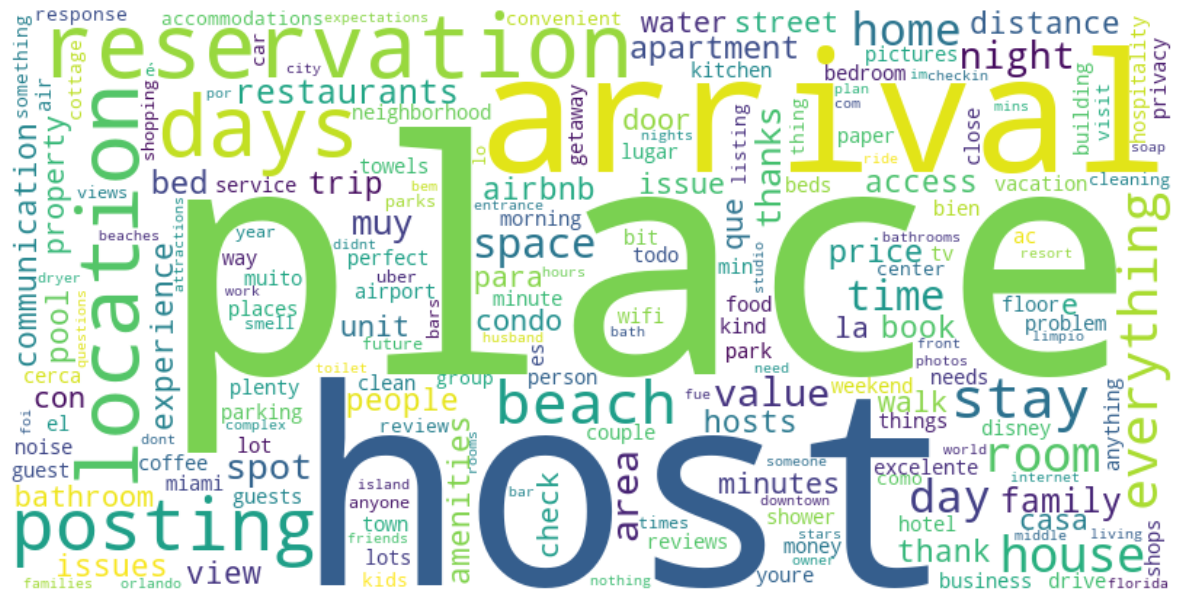

In [ ]:
# WordCloud 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

# WordCloud 시각화
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 2-2) 보통 감성 키워드 추출(형용사)

In [ ]:
def preprocess_text(text):
    # 숫자 제거
    text = re.sub(r'\d+', '', text)
    # 특수문자 제거
    text = re.sub(r'[^\w\s]', '', text)
    # 소문자 변환
    text = text.lower()
    return text


def extract_adjectives(text):
    tokens = nltk.word_tokenize(text)
    # 여기서 pos를 정의하고 사용합니다.
    adjectives = [word for (word, pos) in nltk.pos_tag(tokens) if pos.startswith('JJ')]
    return adjectives

#전처리 적용
preprocess = preprocess_text(common_review)

#형용사 추출
adject = extract_adjectives(preprocess)

# 불용어 제거
stop_words = set(stopwords.words('english'))
filtered_adjectives = [word for word in adject if word.lower() not in stop_words]

#형용사 빈도 계산
freq = nltk.FreqDist(filtered_adjectives)

freq.most_common()

[('great', 1621),
 ('automated', 789),
 ('nice', 324),
 ('good', 268),
 ('clean', 161),
 ('little', 141),
 ('beautiful', 131),
 ('awesome', 124),
 ('perfect', 121),
 ('excellent', 114),
 ('next', 102),
 ('quick', 100),
 ('wonderful', 97),
 ('easy', 92),
 ('private', 90),
 ('short', 77),
 ('comfortable', 74),
 ('small', 66),
 ('close', 66),
 ('quiet', 65),
 ('amazing', 61),
 ('best', 61),
 ('sure', 53),
 ('first', 50),
 ('much', 47),
 ('una', 47),
 ('many', 46),
 ('un', 46),
 ('large', 45),
 ('last', 40),
 ('fantastic', 38),
 ('able', 38),
 ('stay', 37),
 ('big', 37),
 ('bad', 37),
 ('central', 35),
 ('old', 35),
 ('new', 34),
 ('second', 33),
 ('south', 33),
 ('airbnb', 31),
 ('overall', 30),
 ('due', 30),
 ('advertised', 28),
 ('basic', 28),
 ('spacious', 28),
 ('described', 27),
 ('cute', 25),
 ('loud', 25),
 ('local', 25),
 ('different', 24),
 ('long', 24),
 ('friendly', 24),
 ('full', 24),
 ('super', 24),
 ('hard', 23),
 ('ok', 23),
 ('nos', 23),
 ('wrong', 22),
 ('main', 22),
 ('u

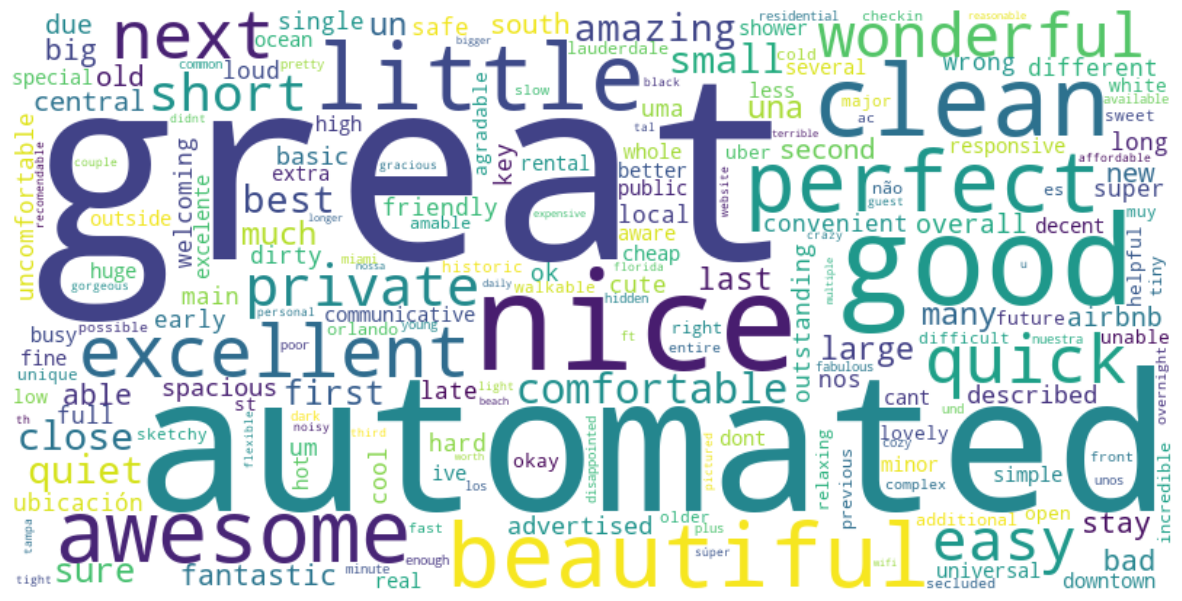

In [ ]:
# WordCloud 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq)

# WordCloud 시각화
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 2-3) 보통 감성 키워드 추출(동사)

In [ ]:
def extract_verbs(text):
    tokens = nltk.word_tokenize(text)
    # 여기서 pos를 정의하고 사용합니다.
    verbs = [word for (word, pos) in nltk.pos_tag(tokens) if pos.startswith('VB')]
    return verbs

# 전처리 적용
preprocessed_review = preprocess_text(common_review)

# 동사 추출
verbs = extract_verbs(preprocessed_review)

# 불용어 제거
stop_words = set(stopwords.words('english'))
filtered_verbs = [word for word in verbs if word.lower() not in stop_words]

# 동사 빈도 계산
verb = nltk.FreqDist(filtered_verbs)

verb.most_common()

[('canceled', 795),
 ('stay', 642),
 ('posting', 223),
 ('needed', 121),
 ('need', 120),
 ('get', 120),
 ('walking', 84),
 ('loved', 84),
 ('accommodating', 83),
 ('staying', 78),
 ('come', 76),
 ('amazing', 70),
 ('want', 68),
 ('go', 63),
 ('located', 61),
 ('use', 61),
 ('didnt', 58),
 ('stayed', 58),
 ('looking', 56),
 ('make', 54),
 ('find', 53),
 ('expected', 48),
 ('made', 47),
 ('said', 43),
 ('provided', 41),
 ('going', 40),
 ('got', 39),
 ('left', 38),
 ('recommend', 38),
 ('came', 37),
 ('take', 37),
 ('described', 37),
 ('dont', 36),
 ('beach', 36),
 ('parking', 35),
 ('coming', 35),
 ('bring', 35),
 ('downtown', 34),
 ('sleep', 34),
 ('respond', 33),
 ('enjoyed', 32),
 ('love', 32),
 ('see', 32),
 ('disney', 32),
 ('walk', 30),
 ('look', 30),
 ('felt', 30),
 ('leave', 29),
 ('getting', 29),
 ('check', 29),
 ('went', 28),
 ('booking', 27),
 ('used', 26),
 ('booked', 25),
 ('arrived', 25),
 ('perfect', 25),
 ('welcoming', 25),
 ('let', 25),
 ('feel', 24),
 ('return', 23),
 (

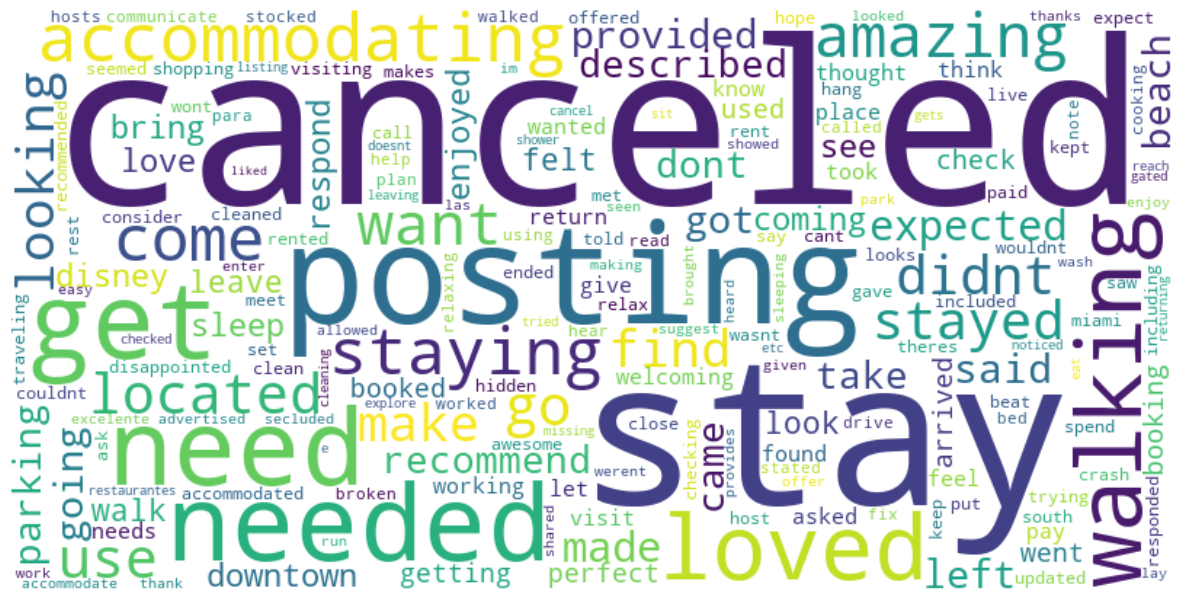

In [ ]:
# WordCloud 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(verb)

# WordCloud 시각화
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 3-1) 불만족 감성 키워드 추출(명사)

In [ ]:
with open('/Users/gimjimin/Downloads/disreveiw.txt', 'r') as file:
    dis = file.read()

In [ ]:
# review text를 하나의 문자열로 합치기
dis_review = ''.join(dis)

def preprocess_text(text):
    # 숫자 제거
    text = re.sub(r'\d+', '', text)
    # 특수문자 제거
    text = re.sub(r'[^\w\s]', '', text)
    # 소문자 변환
    text = text.lower()
    return text

def extract_nouns(text):
    tokens = nltk.word_tokenize(text)
    # 여기서 pos를 정의하고 사용합니다.
    nouns = [word for (word, pos) in nltk.pos_tag(tokens) if pos.startswith('N')]
    return nouns

#전처리 적용
preprocess = preprocess_text(dis_review)

# 명사 추출
nouns = extract_nouns(preprocess)

# 불용어 제거
stop_words = set(stopwords.words('english'))
filtered_nouns = [word for word in nouns if word.lower() not in stop_words]

# 명사 빈도 계산
freq_dist = nltk.FreqDist(filtered_nouns)

freq_dist.most_common()

[('place', 446),
 ('house', 287),
 ('host', 278),
 ('room', 277),
 ('night', 211),
 ('location', 199),
 ('stay', 181),
 ('day', 169),
 ('time', 164),
 ('bathroom', 163),
 ('airbnb', 143),
 ('bed', 143),
 ('unit', 140),
 ('home', 140),
 ('apartment', 135),
 ('beach', 124),
 ('door', 120),
 ('kitchen', 117),
 ('issues', 117),
 ('people', 112),
 ('experience', 109),
 ('water', 107),
 ('pool', 102),
 ('everything', 102),
 ('issue', 102),
 ('guests', 97),
 ('bedroom', 95),
 ('area', 92),
 ('things', 84),
 ('floor', 84),
 ('towels', 83),
 ('property', 81),
 ('air', 78),
 ('noise', 76),
 ('problem', 74),
 ('beds', 72),
 ('space', 72),
 ('days', 70),
 ('listing', 67),
 ('toilet', 65),
 ('price', 62),
 ('building', 62),
 ('paper', 62),
 ('shower', 62),
 ('trash', 62),
 ('morning', 62),
 ('way', 60),
 ('hours', 60),
 ('bugs', 59),
 ('sink', 58),
 ('tv', 57),
 ('coffee', 55),
 ('check', 54),
 ('thing', 54),
 ('money', 53),
 ('condo', 53),
 ('pictures', 51),
 ('times', 51),
 ('parking', 51),
 ('ho

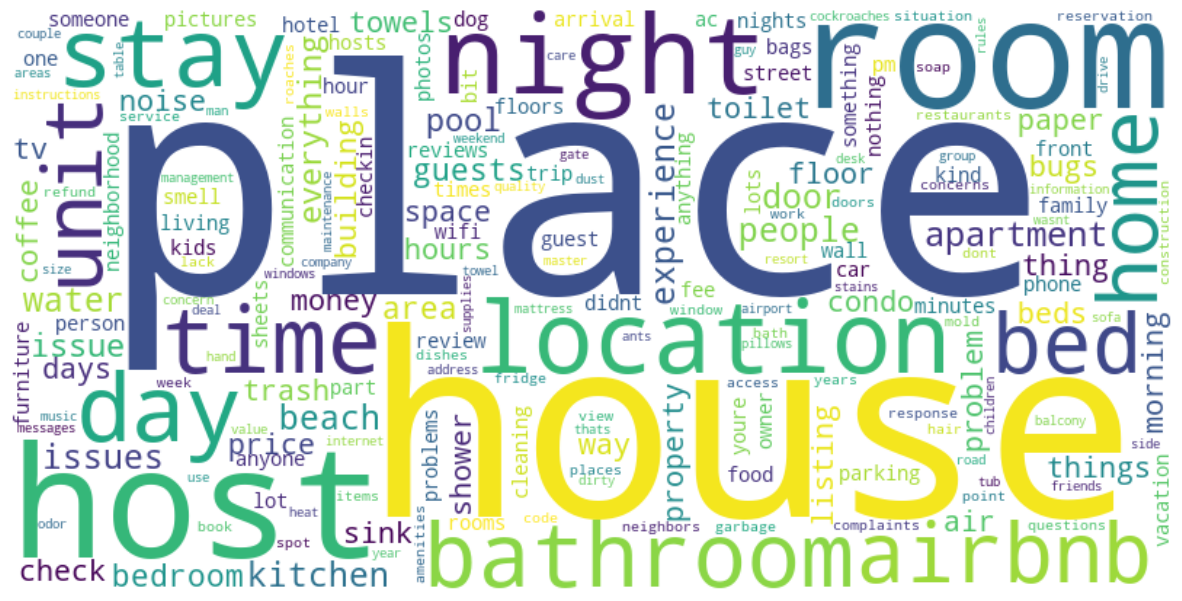

In [ ]:
# WordCloud 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

# WordCloud 시각화
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 3-2) 불만족 감성 키워드 추출(형용사)

In [ ]:
from nltk.corpus import stopwords
from nltk import FreqDist

def preprocess_text(text):
    # 숫자 제거
    text = re.sub(r'\d+', '', text)
    # 특수문자 제거
    text = re.sub(r'[^\w\s]', '', text)
    # 소문자 변환
    text = text.lower()
    return text


def extract_adjectives(text):
    tokens = nltk.word_tokenize(text)
    # 여기서 pos를 정의하고 사용합니다.
    adjectives = [word for (word, pos) in nltk.pos_tag(tokens) if pos.startswith('JJ')]
    return adjectives

#전처리 적용
preprocess = preprocess_text(dis)

#형용사 추출
adject = extract_adjectives(preprocess)

# 불용어 제거
stop_words = set(stopwords.words('english'))
filtered_adjectives = [word for word in adject if word.lower() not in stop_words]

# 제외할 특정 단어 리스트
exclude_words = ['great', 'nice', 'first','good','clean','comfortable','next','sure','full']

# 불용어 및 특정 단어 제외
filtered_adjectives = [word for word in filtered_adjectives if word.lower() not in exclude_words]

# 형용사 빈도 계산
freq = FreqDist(filtered_adjectives)

freq.most_common()

[('bad', 98),
 ('dirty', 93),
 ('little', 82),
 ('small', 73),
 ('old', 67),
 ('hard', 62),
 ('loud', 51),
 ('several', 50),
 ('uncomfortable', 50),
 ('due', 50),
 ('second', 49),
 ('many', 47),
 ('airbnb', 47),
 ('main', 45),
 ('new', 44),
 ('able', 44),
 ('terrible', 43),
 ('worst', 43),
 ('last', 42),
 ('overall', 38),
 ('much', 36),
 ('big', 35),
 ('easy', 35),
 ('difficult', 34),
 ('extra', 33),
 ('ive', 33),
 ('horrible', 33),
 ('private', 32),
 ('hot', 32),
 ('filthy', 31),
 ('different', 31),
 ('quick', 30),
 ('short', 30),
 ('wrong', 30),
 ('quiet', 30),
 ('whole', 29),
 ('entire', 29),
 ('perfect', 28),
 ('previous', 28),
 ('late', 28),
 ('poor', 27),
 ('negative', 27),
 ('super', 27),
 ('long', 26),
 ('fine', 25),
 ('broken', 25),
 ('huge', 25),
 ('dead', 24),
 ('ok', 23),
 ('cold', 23),
 ('open', 23),
 ('large', 23),
 ('cheap', 23),
 ('rental', 22),
 ('light', 22),
 ('basic', 22),
 ('shower', 21),
 ('right', 21),
 ('single', 21),
 ('less', 21),
 ('noisy', 20),
 ('least', 20

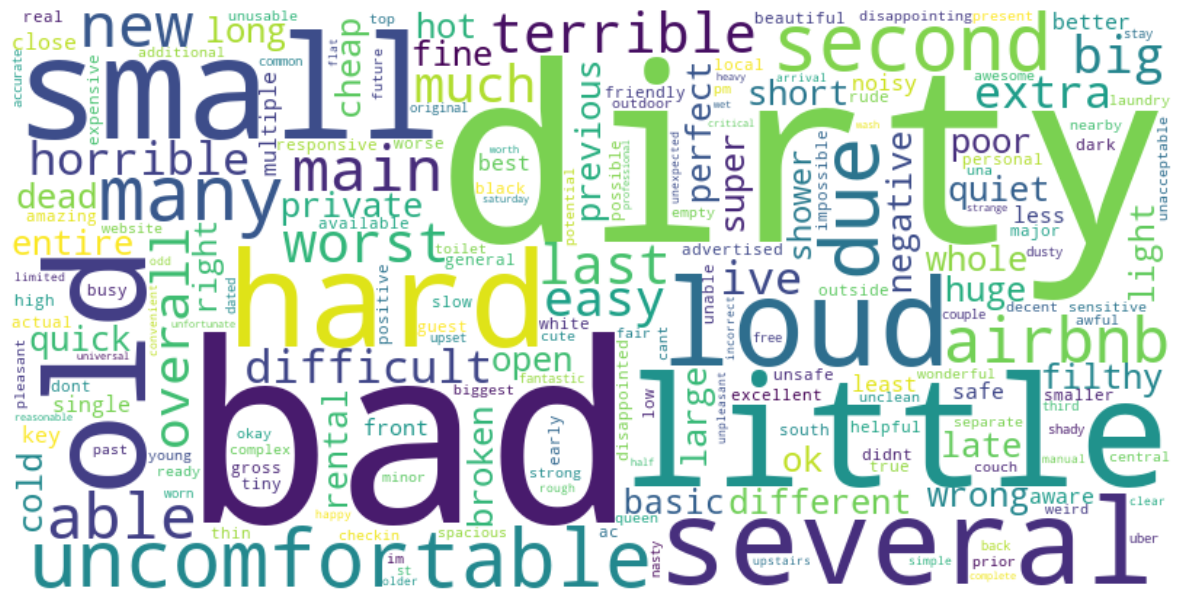

In [ ]:
from wordcloud import WordCloud

# WordCloud 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq)

# WordCloud 시각화
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 3-3) 불만족 감성 키워드 추출(동사)

In [ ]:
def extract_verbs(text):
    tokens = nltk.word_tokenize(text)
    # 여기서 pos를 정의하고 사용합니다.
    verbs = [word for (word, pos) in nltk.pos_tag(tokens) if pos.startswith('VB')]
    return verbs

# 전처리 적용
preprocessed_review = preprocess_text(dis_review)

# 동사 추출
verbs = extract_verbs(preprocessed_review)

# 불용어 제거
stop_words = set(stopwords.words('english'))
filtered_verbs = [word for word in verbs if word.lower() not in stop_words]

# 동사 빈도 계산
verb = nltk.FreqDist(filtered_verbs)

verb.most_common()

[('get', 201),
 ('stay', 187),
 ('left', 111),
 ('got', 108),
 ('didnt', 101),
 ('said', 99),
 ('told', 95),
 ('made', 86),
 ('find', 84),
 ('staying', 79),
 ('asked', 72),
 ('arrived', 71),
 ('sleep', 71),
 ('go', 69),
 ('make', 68),
 ('use', 67),
 ('stayed', 67),
 ('broken', 65),
 ('found', 64),
 ('want', 62),
 ('know', 62),
 ('dont', 60),
 ('needed', 60),
 ('came', 59),
 ('going', 59),
 ('went', 58),
 ('leave', 57),
 ('check', 54),
 ('need', 54),
 ('take', 52),
 ('wasnt', 51),
 ('booked', 50),
 ('used', 50),
 ('recommend', 50),
 ('come', 50),
 ('put', 49),
 ('say', 48),
 ('felt', 48),
 ('pay', 44),
 ('wanted', 43),
 ('called', 43),
 ('cleaned', 42),
 ('provided', 42),
 ('looking', 41),
 ('think', 41),
 ('feel', 41),
 ('see', 41),
 ('expected', 38),
 ('walking', 37),
 ('took', 37),
 ('tried', 37),
 ('paid', 37),
 ('clean', 37),
 ('let', 37),
 ('getting', 36),
 ('coming', 36),
 ('gave', 35),
 ('thought', 33),
 ('smelled', 32),
 ('located', 32),
 ('making', 32),
 ('checked', 32),
 ('se

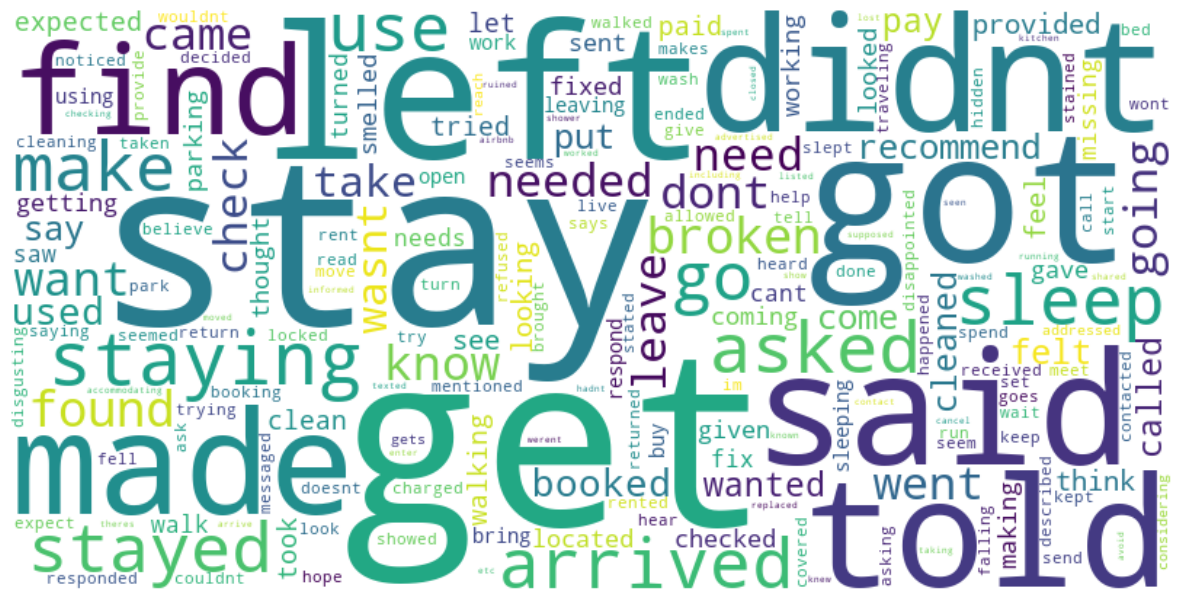

In [ ]:
# WordCloud 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(verb)

# WordCloud 시각화
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()